In [2]:
%matplotlib inline

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import gdal
import scipy as sp
import csv


#import cartopy
#import imageio

In [3]:
s_time = datetime(2019,1,26,0)
e_time = datetime(2019,2,8,0)

#Townsville
lat_tv = -19.25
lon_tv = 146.77

#Brisbane
# lat_tv =-27.463
# lon_tv = 153.026

#Gulf
#lat_tv =  -17.882
#lon_tv =  140.369


#lat0 = -10
#lat1 = -30
#lon0 = 135
#lon1 = 155
res = 0.05


In [4]:
# path for HIMAWARI (after running Pablos algorthim to stack nc files)
path_him = '/g/data1a/oe9/user/ds4491/Him_Extract_Test/HIM8_TWNV_SE_2019.nc'

path_awap = '/g/data1a/oe9/user/data/gridded_rainfall_0.05deg/rain_day_2019_Actual_day.nc'

path_gauge = '/g/data1a/oe9/user/ds4491/Him_Extract_Test/Townsville_Hourly_Rainfall.csv'

In [5]:
him = xr.open_dataset(path_him)
him = him.sel(lat = lat_tv, lon = lon_tv, method = 'nearest')
him = him.isel(time = slice(2,len(him.time.values)))

In [6]:
#Create individal filters and create a cummulative filter

him['f1'] = (him['B14']<=230)
him['f2'] = (him['B8']-him['B12'])>= -10

him['mask_n'] = him['f1']*1 + him['f2']*1

In [7]:
him['f3'] = (him['B8']-him['B10'])>= -7
him['f4'] = (him['B16']-him['B14'])>= -5

him['mask_n'] = him['mask_n']*1 + him['f3']*1 + him['f4']*1

In [8]:
him['f5'] = (him['B15']-him['B14'])>= -1.5
him['f6'] = (him['B11']-him['B14'])>= 2

him['mask_n'] = him['mask_n']*1 + him['f5']*1 + him['f6']*1

In [9]:
him['f7'] = (((him['B8']+him['B13'])/2)-273) <= -35
him['mask_n'] = him['mask_n'] + him['f7']*1


In [10]:
him['mask']= him['mask_n']>=5

In [11]:
with open(path_gauge, 'r') as f:\
    rain = list(csv.reader(f, delimiter=","))

rain = np.array(rain[1:],dtype = np.float)
hour = 10000*1000*rain[:,0]+1000*100*rain[:,1]+1000*(rain[:,2])+(1000*(rain[:,3]-10)/24)
hour = np.floor(hour)/1000
hour_rain = np.array((hour, rain[:,-1]))
hour_rain = np.swapaxes(hour_rain,0,1)
hour_rain

array([[2.01901256e+07, 0.00000000e+00],
       [2.01901256e+07, 0.00000000e+00],
       [2.01901257e+07, 0.00000000e+00],
       [2.01901257e+07, 0.00000000e+00],
       [2.01901258e+07, 0.00000000e+00],
       [2.01901258e+07, 0.00000000e+00],
       [2.01901258e+07, 0.00000000e+00],
       [2.01901259e+07, 0.00000000e+00],
       [2.01901259e+07, 0.00000000e+00],
       [2.01901260e+07, 0.00000000e+00],
       [2.01901260e+07, 2.00000000e-01],
       [2.01901260e+07, 0.00000000e+00],
       [2.01901261e+07, 0.00000000e+00],
       [2.01901261e+07, 0.00000000e+00],
       [2.01901262e+07, 0.00000000e+00],
       [2.01901262e+07, 0.00000000e+00],
       [2.01901262e+07, 0.00000000e+00],
       [2.01901263e+07, 0.00000000e+00],
       [2.01901263e+07, 0.00000000e+00],
       [2.01901264e+07, 2.00000000e-01],
       [2.01901264e+07, 2.80000000e+00],
       [2.01901265e+07, 2.00000000e-01],
       [2.01901265e+07, 0.00000000e+00],
       [2.01901265e+07, 0.00000000e+00],
       [2.019012

In [12]:

him2 = him.copy()
him2.time.values = np.floor(him2.time*1000)/1000

index_time = np.unique(him2.time.values, return_index=True)


lat = him2['lat'].values
lon = him2['lon'].values
time = him2['time'].values


date_convect = np.empty((len(him2.time.values),2))

for ii in np.arange(len(him2.time.values)):
    
    date_convect[ii,0] = him2.time.values[ii]
    date_convect[ii,1] = np.any(him2['mask'].sel(time=him2.time.values[ii]).values)

# #     if ii==0:
#         mask_all = mask.copy()
#         mask_all = np.expand_dims(mask_all,axis=1)
#         mask_all = np.expand_dims(mask_all,axis=0)
#     else:
#         mask = np.expand_dims( mask,axis=1)
#         mask = np.expand_dims( mask,axis=0)
#         mask_all= np.append( mask_all,mask,axis=0)

        
# Create new xarray object
#him4 = xr.Dataset({'mask': (['time', 'lat', 'lon'],  mask_all)},coords={ 'lon': lon, 'lat': lat, 'time': time})

#print(him4)
#fig, axes = plt.subplots(ncols=2,figsize=(20,10))


#him4['mask'].isel(time=0).plot(ax=axes[0])

#him4['mask'].isel(time=2).plot(ax=axes[1])


In [13]:
# #him = xr.open_dataset(path_him)

# import pandas as pd

# awap= xr.open_dataset(path_awap)
# awap = awap.sel(latitude = lat_tv, longitude = lon_tv, method = 'nearest')
# awap = awap.sel(time = slice(s_time,e_time))


# awap_date = awap.time.data
# awap_rain = awap.rain_day.values
# awap_date = pd.DatetimeIndex(awap_date)

# #awap['rain_day'].sel(time=datetime(2019,1,28,0)).plot(figsize = (8,6))
# print(awap_date)
# awap_date=(awap_date.year*10000)+awap_date.month*100+awap_date.day
# awap_date = awap_date/1
# date_convect[:,0]

In [14]:
hour_rain.dtype,date_convect.dtype

(dtype('float64'), dtype('float64'))

In [15]:


col= np.expand_dims(0* date_convect[:,1],axis=1)

date_convect_rain = np.append(date_convect, col,axis = 1)

print(date_convect_rain.shape)



for ii in np.arange(date_convect_rain.shape[0]):
    filt = (hour_rain[:,0] == date_convect_rain[ii,0])
    #print(np.any(filt))
    if np.any(filt)==True:
        date_convect_rain[ii,2] = hour_rain[filt,1]
    else:
        date_convect_rain[ii,2] = 0

date_convect_rain

(315, 3)


array([[2.01901260e+07, 0.00000000e+00, 2.00000000e-01],
       [2.01901260e+07, 0.00000000e+00, 0.00000000e+00],
       [2.01901261e+07, 0.00000000e+00, 0.00000000e+00],
       [2.01901261e+07, 1.00000000e+00, 0.00000000e+00],
       [2.01901262e+07, 1.00000000e+00, 0.00000000e+00],
       [2.01901262e+07, 1.00000000e+00, 0.00000000e+00],
       [2.01901262e+07, 0.00000000e+00, 0.00000000e+00],
       [2.01901262e+07, 0.00000000e+00, 0.00000000e+00],
       [2.01901262e+07, 0.00000000e+00, 0.00000000e+00],
       [2.01901263e+07, 1.00000000e+00, 0.00000000e+00],
       [2.01901263e+07, 0.00000000e+00, 0.00000000e+00],
       [2.01901264e+07, 1.00000000e+00, 2.00000000e-01],
       [2.01901264e+07, 0.00000000e+00, 2.80000000e+00],
       [2.01901265e+07, 1.00000000e+00, 2.00000000e-01],
       [2.01901265e+07, 1.00000000e+00, 0.00000000e+00],
       [2.01901265e+07, 1.00000000e+00, 0.00000000e+00],
       [2.01901265e+07, 1.00000000e+00, 0.00000000e+00],
       [2.01901265e+07, 1.00000

In [16]:
N = len((date_convect_rain[:,0]))

rain_convect_hour = 0*(date_convect_rain[:,0])

rain_other_hour = 0*(date_convect_rain[:,0])

conv_filt= (date_convect_rain[:,1]==1)
non_conv_filt= (date_convect_rain[:,1]==0)

rain_convect_hour[conv_filt] =  date_convect_rain[conv_filt,2]
rain_other_hour[non_conv_filt] =  date_convect_rain[non_conv_filt,2]
    

    


In [17]:
np.arange(N).shape
#rain_convect_hour.shape
rain_other_hour

array([ 0.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  2.8,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1.8,  1.4,  0.8,  0.2,
        0. ,  0. ,  1.2,  0.8,  0.4,  5.2,  3.2,  3.2,  2.8,  1.8,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  2.6,  0.6,  0. ,  0. ,
        8. ,  2.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  4.4,  9.8,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,
        0. ,  0.2,  7.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        2.8,  4.2,  0. ,  0.2,  0.2,  0. ,  0.8,  0.2,  2.2,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0.2,  0. ,  1. ,  1.4,  6.8,  1.8,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0

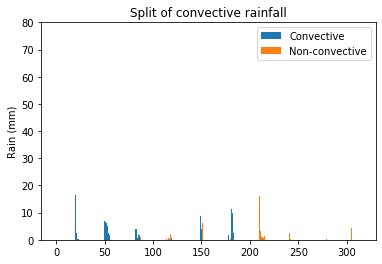

In [18]:
ind = np.arange(N)
width = 0.2
p1 = plt.bar(ind,rain_convect_hour,width)
p2 = plt.bar(ind,rain_other_hour,width,bottom = rain_convect_hour)


# menMeans = (20, 35, 30, 35, 27)
# womenMeans = (25, 32, 34, 20, 25)
# menStd = (2, 3, 4, 1, 2)
# womenStd = (3, 5, 2, 3, 3)
# ind = np.arange(N)    # the x locations for the groups
# width = 0.35       # the width of the bars: can also be len(x) sequence

# p1 = plt.bar(ind, menMeans, width, yerr=menStd)
# p2 = plt.bar(ind, womenMeans, width,
#              bottom=menMeans, yerr=womenStd)

#month_lab = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.ylabel('Rain (mm)')
plt.title('Split of convective rainfall')
#plt.xticks(ind, month_lab[0:(N)])
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Convective', 'Non-convective'))

# plt.show()

(0.1, 110)

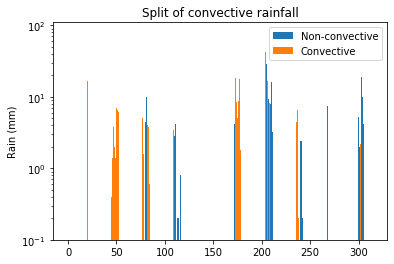

In [19]:
    
ind = np.arange(N)
width = 0.25


p1 = plt.bar(ind,rain_other_hour,width,log=True)
p2 = plt.bar(ind,rain_convect_hour,width,bottom = rain_other_hour,log=True)

# menMeans = (20, 35, 30, 35, 27)
# womenMeans = (25, 32, 34, 20, 25)
# menStd = (2, 3, 4, 1, 2)
# womenStd = (3, 5, 2, 3, 3)
# ind = np.arange(N)    # the x locations for the groups
# width = 0.35       # the width of the bars: can also be len(x) sequence

# p1 = plt.bar(ind, menMeans, width, yerr=menStd)
# p2 = plt.bar(ind, womenMeans, width,
#              bottom=menMeans, yerr=womenStd)

month_lab = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.ylabel('Rain (mm)')
plt.title('Split of convective rainfall')
#plt.xticks(ind, month_lab[0:(N)])
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ( 'Non-convective','Convective'))
plt.ylim((0.1,110))
# plt.show()

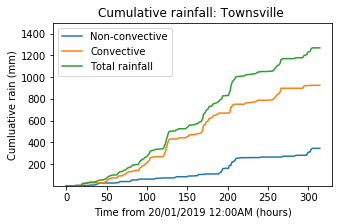

In [29]:
ind = np.arange(N)
width = 0.25

plt.figure(figsize=(5,3))
p1 = plt.plot(rain_other_hour.cumsum())
p2 = plt.plot(rain_convect_hour.cumsum())
p3 = plt.plot(date_convect_rain[:,2].cumsum())

plt.ylabel('Cumluative rain (mm)')
plt.title('Cumulative rainfall: Townsville ')
#plt.xticks(ind, month_lab[0:(N)])
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0],p3[0]), ('Non-convective','Convective','Total rainfall'))
plt.ylim((0.1,1500))
plt.xlabel('Time from 20/01/2019 12:00AM (hours)')
plt.savefig('Townsvile_Cumul_Rainfall.png')